In [ ]:
import os 
ptoluidine_protonated =-160.66559454
ZINC =  -22155.05314789

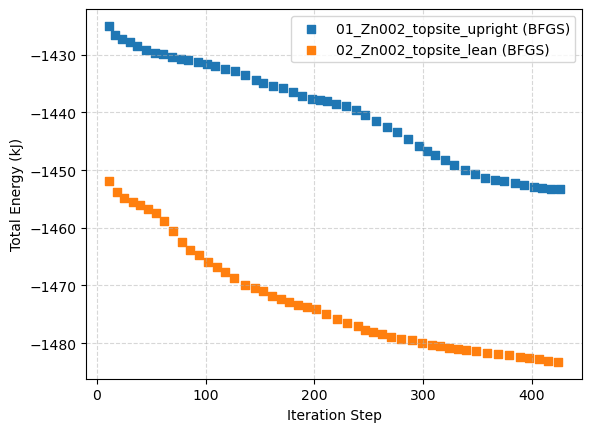

In [3]:
import os
import pandas as pd 
import matplotlib.pyplot as plt


dirs = [x for x in os.listdir() if os.path.isdir(x)]
colors = plt.cm.tab10.colors  # 10가지 색상을 사용
df_l = {}
for idx, d in enumerate(dirs):
    csv_files = [x for x in os.listdir(d) if ".csv" in x]
    if not csv_files:
        di =[ x for x in os.listdir(d) if os.path.isdir(os.path.join(d, x))]
        ll = []
        for dii in di:
            csv_files = [os.path.join(d, dii, x) for x in os.listdir(os.path.join(d, dii)) if ".csv" in x][0]
            ll.append(pd.read_csv(csv_files))
        df = pd.concat(ll , axis = 0)
        df = df.reset_index(drop = True)
    else:
        csv_file = csv_files[0]
        df = pd.read_csv(os.path.join(d, csv_file))
    
    # 에너지 단위 변환 및 새로운 열 추가 (단위: kJ)
    df["ad_energy_kj"] = (df["energy"] - ptoluidine_protonated- ZINC) * 2625.49884478051
    
    # 데이터의 앞 4개 step은 제외 (인덱스 4 이후 사용)
    df = df.iloc[4:]
    df_l[d] = df
    # "step_type" 컬럼이 있다면 BFGS와 SCF 데이터를 분리, 없으면 모두 SCF로 처리
    if "step_type" in df.columns:
        df_bfgs = df[df["step_type"] == "BFGS_step"]
        df_scf = df[df["step_type"] != "BFGS_step"]
    else:
        df_bfgs = pd.DataFrame(columns=df.columns)  # 빈 DataFrame
        df_scf = df
        
    # # SCF 단계: 원형 마커, 지정 색상
    # plt.scatter(df_scf.index, -abs(df_scf["ad_energy_kj"]),
    #             label=f"{d} (SCF)", marker='o', color=colors[idx % len(colors)], alpha = 0.7)
    
    # BFGS 단계: 정사각형 마커, 같은 색상으로 표시
    plt.scatter(df_bfgs.index, -abs(df_bfgs["ad_energy_kj"]),
                label=f"{d} (BFGS)", marker='s', color=colors[idx % len(colors)])
    
    # BFGS 데이터 포인트에 텍스트로 에너지 값을 표시 (소수점 둘째자리)
    # for i, row in df_bfgs.iterrows():
    #     plt.text(i, -abs(row["ad_energy_kj"]),
    #               f'{row["ad_energy_kj"]:.2f}',
    #              fontsize=8, color=colors[idx % len(colors)], ha='center', va='bottom')

plt.xlabel("Iteration Step")
plt.ylabel("Total Energy (kJ)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


-51.84126234002264


C:\Users\PSID_PC_20\AppData\Local\Temp\ipykernel_9980\2279285597.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x="Category", y="Energy_kj", palette="viridis")


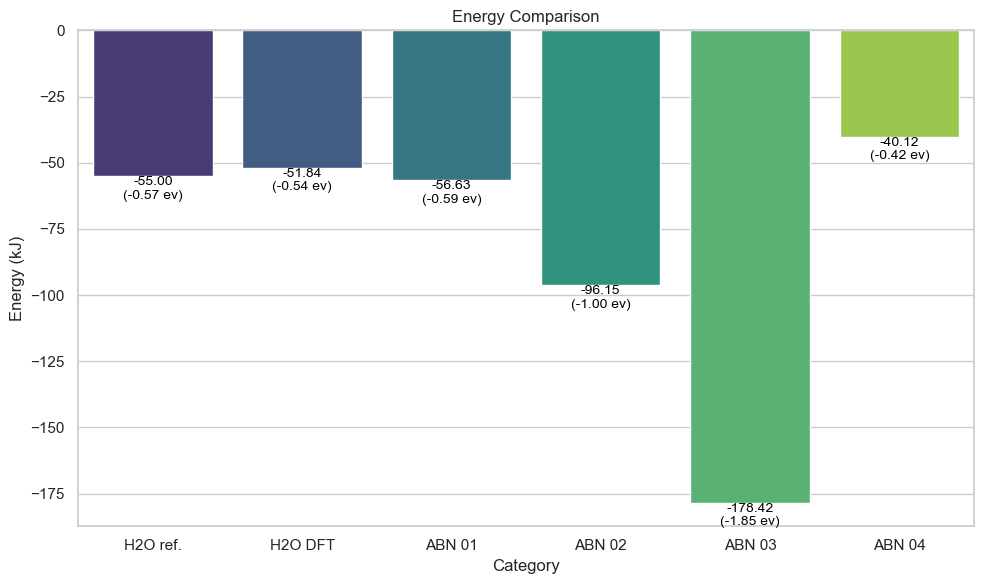

In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 상수 설정
ev_to_kj = 96.4855216070127
ha_to_ev = 27.211324570273
H2O_Zn002_ref_ev = -0.57
H2O_Zn002_ref_kj = H2O_Zn002_ref_ev * ev_to_kj
H2O_Zn002_calc_ev = (-22199.10888744 - H2O_ZINC) * ha_to_ev
H2O_Zn002_calc_kj = H2O_Zn002_calc_ev * ev_to_kj
print(H2O_Zn002_calc_kj)

# df_l: 각 그룹별 DataFrame을 담은 딕셔너리라고 가정
# 각 그룹의 마지막 행에서 "ad_energy_kj" 값을 읽어 data_list 생성 (동적 에너지 값)
data_list = []
a = ["H2O ref.", "H2O DFT", "ABN 01", "ABN 02", "ABN 03", "ABN 04"]
for j, df in df_l.items():
    energy_kj = df.iloc[-1]["ad_energy_kj"]
    energy_ev = energy_kj / ev_to_kj
    data_list.append({
        "Group": j,
        "Energy_kj": energy_kj,
        "Energy_ev": energy_ev
    })

# data: 기준값 두 개와 각 그룹의 동적 에너지 값을 결합 (총 6개)
data = [H2O_Zn002_ref_kj, H2O_Zn002_calc_kj] + [x["Energy_kj"] for x in data_list]

# DataFrame 생성: 각 카테고리와 대응하는 에너지 값 (kJ)
df_plot = pd.DataFrame({"Category": a, "Energy_kj": data})

# seaborn 테마 설정
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# barplot 그리기 (palette는 "viridis" 사용)
ax = sns.barplot(data=df_plot, x="Category", y="Energy_kj", palette="viridis")

# 각 막대 위에 에너지 값을 kJ와 ev 단위로 텍스트로 표시 (ev 값은 kJ 값을 ev_to_kj로 나눈 값)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    height = p.get_height()
    ev_val = height / ev_to_kj
    ax.text(x, height, f'{height:.2f}\n({ev_val:.2f} ev)', ha='center', va='top', fontsize=10, color='black')

plt.ylabel("Energy (kJ)")
plt.title("Energy Comparison")
plt.tight_layout()
plt.show()


[-54.99674731599723,
 -51.84126234002264,
 -55.954631381963,
 -89.9053245079287,
 -177.1454001229141,
 -38.81306448509814]